In [2]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import cmocean

In [3]:
CMIP_PR = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/pr/gr/*/*_195801*.nc")
BARPA_PR = iris.load_cube("/home/548/eh6215/EC_prcp.nc")
BARPA_PR.units = "mm/s"
CMIP_PR.units = "mm/s"
BARPA_PR.convert_units('mm/day')
CMIP_PR.convert_units('mm/day')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(


In [4]:
cx = iris.Constraint(longitude=lambda x: 90<=x<=200)
cy = iris.Constraint(latitude=lambda y:-55<=y<=10)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


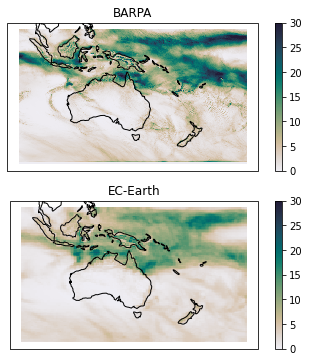

In [5]:
plt.figure(figsize=(6,6))
ax=plt.subplot(211,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(BARPA_PR[0].extract(cx&cy),vmin=0,vmax=30,cmap=cmocean.cm.rain)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(212,projection=ccrs.PlateCarree(180))
plt.title("EC-Earth")
iplt.pcolormesh(CMIP_PR[0].extract(cx&cy),vmin=0,vmax=30,cmap=cmocean.cm.rain)
plt.colorbar()
ax.coastlines()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


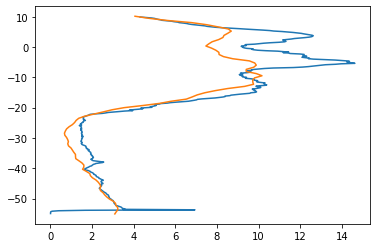

In [19]:

iplt.plot(BARPA_PR[0].extract(cx&cy).collapsed('longitude',iris.analysis.MEAN))#,vmin=0,vmax=30)
iplt.plot(CMIP_PR[0].extract(cx&cy).collapsed('longitude',iris.analysis.MEAN))#,vmin=0,vmax=30)


In [2]:
path = "/g/data/tp28/dev/barpa/prod/hxy548/u-cg282/19580101T0000Z/nc/"

T_day1 = iris.load(path+"SLV15M/temp_scrn-CMIP6-EC-Earth3-historical-r1i1p1f1-barpa_r-v1-195801*")
P_day1 = iris.load(path+"SLV15M/mslp-CMIP6-EC-Earth3-historical-r1i1p1f1-barpa_r-v1-195801*")

In [3]:
iris.util.equalise_attributes(T_day1)
iris.util.equalise_attributes(P_day1)
T_day1=T_day1.concatenate_cube()
P_day1=P_day1.concatenate_cube()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib

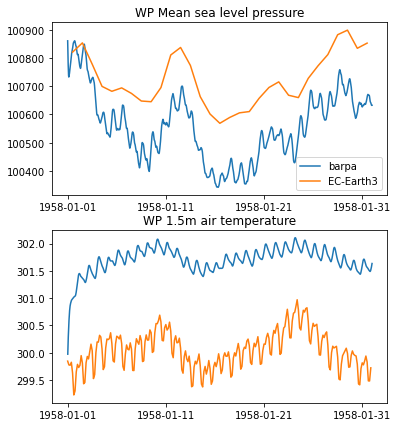

In [74]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda y: -10<=y<=10)
plt.figure(figsize=(6,7))
plt.subplot(211)
plt.title("WP Mean sea level pressure")
iplt.plot(P_day1.extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN),label='barpa')
iplt.plot(CMIP_Pday[:31].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN),label='EC-Earth3')
plt.legend()
plt.subplot(212)
plt.title("WP 1.5m air temperature")
iplt.plot(T_day1.extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN))
iplt.plot(CMIP_Tday[:31*8].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN))


In [4]:
CMIP_Tday = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/3hr/tas/gr/*/*_195801*.nc")
CMIP_Pday = iris.load_cube("/g/data/oi10/replicas/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/day/psl/gr/*/*_195801*.nc")


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'psl'
  warnings.warn(


In [60]:
B= P_day1.extract(cx&cy).collapsed('time',iris.analysis.MEAN)
C = CMIP_Pday[:31].extract(cx&cy).collapsed('time',iris.analysis.MEAN)
B = B.regrid(C,iris.analysis.Linear())

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))


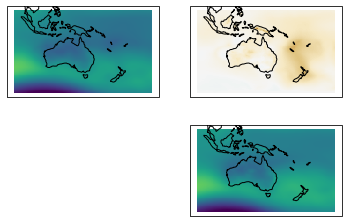

In [62]:
ax=plt.subplot(221,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(B,vmin=99000,vmax=103000)
ax.coastlines()
ax=plt.subplot(224,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(C,vmin=99000,vmax=103000)
ax.coastlines()
ax=plt.subplot(222,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(B-C, cmap='BrBG',vmin=-1000,vmax=1000)
ax.coastlines()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/iris

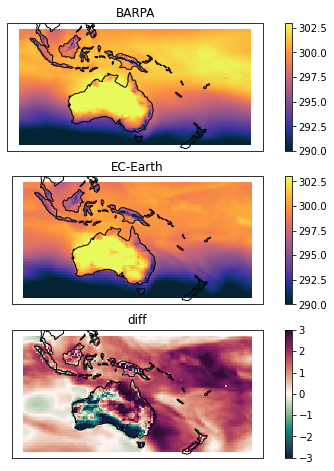

In [7]:
cx = iris.Constraint(longitude=lambda x: 90<=x<=200)
cy = iris.Constraint(latitude=lambda y:-45<=y<=10)

plt.figure(figsize=(8,8))

ax=plt.subplot(311,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(T_day1.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.thermal,vmin=290,vmax=303)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(312,projection=ccrs.PlateCarree(180))
plt.title("EC-Earth")
iplt.pcolormesh(CMIP_Tday[:30].extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.thermal,vmin=290,vmax=303)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(313,projection=ccrs.PlateCarree(180))
plt.title("diff")
iplt.pcolormesh(T_day1.extract(cx&cy).regrid(CMIP_Tday.extract(cx&cy),iris.analysis.Linear()).collapsed('time',iris.analysis.MEAN)-CMIP_Tday[:30].extract(cx&cy).collapsed('time',iris.analysis.MEAN),vmin=-3,vmax=3,cmap=cmocean.cm.curl)
plt.colorbar()
ax.coastlines()

NameError: name 'BARPA_PR' is not defined

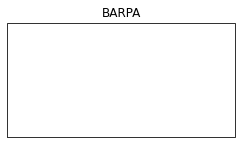

In [5]:
plt.figure(figsize=(9,3))
ax=plt.subplot(31,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(BARPA_PR[0].extract(cx&cy),vmin=0,vmax=30,cmap=cmocean.cm.rain)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(122,projection=ccrs.PlateCarree(180))
plt.title("EC-Earth")
iplt.pcolormesh(CMIP_PR[0].extract(cx&cy),vmin=0,vmax=30,cmap=cmocean.cm.rain)
plt.colorbar()
ax.coastlines()

In [8]:
T_day1

<iris 'Cube' of air_temperature / (K) (time: 2976; latitude: 458; longitude: 798)>

In [13]:
CMIP_Tday

<iris 'Cube' of air_temperature / (K) (time: 2920; latitude: 256; longitude: 512)>

In [ ]:
1